In [1]:
# imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np 

# for distance and h-clustering
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_samples, silhouette_score

# sklearn does have some functionality too, but mostly a wrapper to scipy
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler

! pip install scikit-plot
import scikitplot as skplt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Capstone B3/Midterm/merged_df.csv')
df.head(3)

,Quesh,Quesh Date,Avg Rating,Total Respo,Type,sent_ans,sent_quesh,charcount
0,What is something that you've learned to accept?,2022-02-20,3.78,23,2,1.565217,1.0,113.869565
1,What was your favorite food growing up and wha...,2022-02-19,4.19,16,2,2.750000,3.0,93.437500
2,What form of art fascinates you most?,2022-02-18,4.26,23,2,3.043478,3.0,102.000000


In [4]:
# reset the index
df.index = df.Quesh # reset the index  

# remove the model column 
df.drop(columns='Quesh', inplace=True)
df.drop(columns='Quesh Date', inplace=True)
df.drop(columns='Type', inplace=True)
# make sure the model doesnt exist -- just a numeric dataframe



In [5]:
# standerized 
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.shape

(155, 5)

In [6]:
# cluster row 
hc1 = linkage(df_scaled, method='complete')
hc1

array([[3.10000000e+01, 3.20000000e+01, 2.96440703e-01, 2.00000000e+00],
       [1.02000000e+02, 1.22000000e+02, 3.11654247e-01, 2.00000000e+00],
       [8.70000000e+01, 9.10000000e+01, 3.58102210e-01, 2.00000000e+00],
       [5.80000000e+01, 7.90000000e+01, 3.82315979e-01, 2.00000000e+00],
       [1.07000000e+02, 1.12000000e+02, 4.05993750e-01, 2.00000000e+00],
       [5.30000000e+01, 9.60000000e+01, 4.82189328e-01, 2.00000000e+00],
       [4.30000000e+01, 9.20000000e+01, 4.92400497e-01, 2.00000000e+00],
       [7.70000000e+01, 8.50000000e+01, 5.11097974e-01, 2.00000000e+00],
       [3.90000000e+01, 4.00000000e+01, 5.14431851e-01, 2.00000000e+00],
       [1.27000000e+02, 1.28000000e+02, 5.28609927e-01, 2.00000000e+00],
       [6.30000000e+01, 7.00000000e+01, 5.46371030e-01, 2.00000000e+00],
       [5.20000000e+01, 6.90000000e+01, 5.53899866e-01, 2.00000000e+00],
       [1.00000000e+00, 1.50000000e+01, 5.63103144e-01, 2.00000000e+00],
       [9.50000000e+01, 1.21000000e+02, 5.90044010e

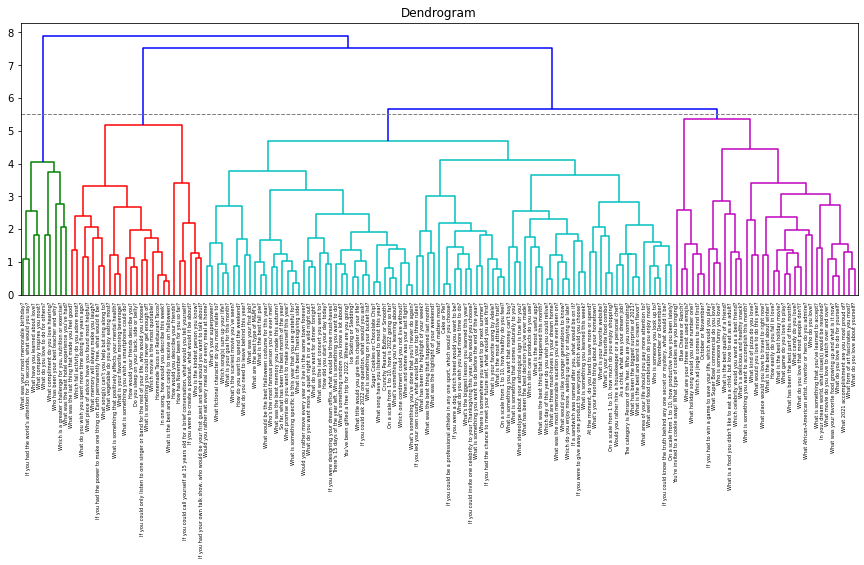

In [21]:
plt.figure(figsize=(15,5))
dendrogram(hc1, labels=df.index)
plt.axhline(y=5.5, c='grey', lw=1, linestyle='dashed')
plt.title('Dendrogram')
plt.show()

In [8]:
# extract 4 cluster
df['cluster'] = fcluster(hc1, 4, criterion='maxclust')
df.sample(5)

,Avg Rating,Total Respo,sent_ans,sent_quesh,charcount,cluster
Quesh,,,,,,
What kind of pizza do you love?,3.79,29,4.103448,3.0,93.482759,4
"If you led your own country, what would be your top three rules?",4.46,13,3.307692,2.0,100.230769,3
What is the best part about winter?,4.15,26,1.115385,3.0,78.230769,4
What was your most memorable birthday?,4.30,10,3.500000,1.0,151.900000,1
What song(s) can’t you help but sing along to?,4.91,11,0.909091,2.0,82.636364,2


In [9]:
df.groupby(by='cluster').count()

,Avg Rating,Total Respo,sent_ans,sent_quesh,charcount
cluster,,,,,
1,9,9,9,9,9
2,25,25,25,25,25
3,87,87,87,87,87
4,34,34,34,34,34


In [10]:
df.groupby(by='cluster').mean()

,Avg Rating,Total Respo,sent_ans,sent_quesh,charcount
cluster,,,,,
1,4.308889,15.111111,5.369164,2.444444,139.529237
2,4.602800,8.280000,1.747472,0.840000,58.830597
3,4.014253,15.839080,1.492997,0.931034,63.383881
4,3.980294,21.205882,2.011687,3.058824,67.193098


In [11]:
df.to_csv('hcluster.csv')